# Market Basket Analysis - Association Rule Mining

**Objective:** Discover patterns in customer purchase behavior using Association Rule Mining.

**What is Association Rule Mining?**
- **Market Basket Analysis:** Find products frequently bought together
- **Association Rules:** If customer buys X, they likely buy Y
- **Applications:** Product recommendations, store layout optimization, cross-selling strategies

**Key Concepts:**
- **Support:** How often items appear together (popularity)
- **Confidence:** How often rule is true (reliability)
- **Lift:** How much more likely items are bought together vs independently

**Algorithms Used:**
1. **Apriori:** Classic algorithm, bottom-up approach
2. **FP-Growth:** Faster algorithm using tree structure

**Key Steps:**
1. Load and prepare transaction data
2. Apply both Apriori and FP-Growth
3. Generate association rules
4. Compare algorithms


In [21]:
# Import necessary libraries for association rule mining
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Statistical plots
from sklearn.preprocessing import StandardScaler  # Not used in this notebook
from mlxtend.preprocessing import TransactionEncoder  # Convert transactions to binary matrix
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules  # Mining algorithms

In [22]:
# Load sales transaction data
# sep=";" indicates the CSV uses semicolon as delimiter
data = pd.read_csv("../Data/Sales.csv", sep=";")

C:\Users\melga\AppData\Local\Temp\ipykernel_31636\1769938893.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Data/Sales.csv", sep=";")


In [23]:
# Use only first 10,000 transactions for faster processing
# Full dataset might be too large for demonstration purposes
data = data.iloc[:10000, :]

In [24]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [25]:
data.shape

(10000, 7)

In [26]:
data = data[['BillNo', 'Itemname']]

In [27]:
data.isnull().sum()

BillNo       0
Itemname    42
dtype: int64

In [28]:
data.dropna(inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9958 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BillNo    9958 non-null   object
 1   Itemname  9958 non-null   object
dtypes: object(2)
memory usage: 233.4+ KB


In [30]:
data.head(10)

,BillNo,Itemname
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [31]:
transactions = data.groupby("BillNo")["Itemname"].apply(list).reset_index()
transactions.head()

,BillNo,Itemname
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,[BATH BUILDING BLOCK WORD]


In [32]:
te = TransactionEncoder()
transactions_bool_list = te.fit(transactions["Itemname"]).transform(transactions["Itemname"])


data_transaction = pd.DataFrame(transactions_bool_list, columns=te.columns_)
data_transaction.shape

(430, 1981)

In [33]:
pd.set_option('display.max_columns', None)
data_transaction.columns

Index(['10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES', '12 PENCIL SMALL TUBE WOODLAND',
       '12 PENCILS SMALL TUBE RED RETROSPOT', '12 PENCILS SMALL TUBE SKULL',
       '12 PENCILS TALL TUBE POSY', '12 PENCILS TALL TUBE RED RETROSPOT',
       ...
       'YELLOW/PINK FLOWER DESIGN BIG MUG', 'YOU'RE CONFUSING ME METAL SIGN',
       'YULETIDE IMAGES GIFT WRAP SET', 'YULETIDE IMAGES S/6 PAPER BOXES',
       'ZINC FINISH 15CM PLANTER POTS', 'ZINC FOLKART SLEIGH BELLS',
       'ZINC HEART LATTICE T-LIGHT HOLDER', 'ZINC METAL HEART DECORATION',
       'ZINC WILLIE WINKIE  CANDLE STICK', 'amazon'],
      dtype='object', length=1981)

# Evaluation for apiori

In [34]:
frequent_itemsets = apriori(data_transaction, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=100)
rules = rules.sort_values(["confidence", "lift"], ascending=[False, False])

rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)

,antecedents,consequents,support,confidence,lift
28,"(RED WOOLLY HOTTIE WHITE HEART., WHITE HANGING...",(KNITTED UNION FLAG HOT WATER BOTTLE),0.053488,0.920000,9.648780
27,"(KNITTED UNION FLAG HOT WATER BOTTLE, WHITE HA...",(RED WOOLLY HOTTIE WHITE HEART.),0.053488,0.884615,9.056777
21,"(HAND WARMER SCOTTY DOG DESIGN, HAND WARMER RE...",(HAND WARMER OWL DESIGN),0.051163,0.880000,7.276923
20,"(HAND WARMER OWL DESIGN, HAND WARMER RED RETRO...",(HAND WARMER SCOTTY DOG DESIGN),0.051163,0.814815,7.150416
26,"(KNITTED UNION FLAG HOT WATER BOTTLE, RED WOOL...",(WHITE HANGING HEART T-LIGHT HOLDER),0.053488,0.766667,5.993939
12,(KNITTED UNION FLAG HOT WATER BOTTLE),(RED WOOLLY HOTTIE WHITE HEART.),0.069767,0.731707,7.491289
13,(RED WOOLLY HOTTIE WHITE HEART.),(KNITTED UNION FLAG HOT WATER BOTTLE),0.069767,0.714286,7.491289
7,(HAND WARMER SCOTTY DOG DESIGN),(HAND WARMER OWL DESIGN),0.079070,0.693878,5.737834
5,(HAND WARMER RED RETROSPOT),(HAND WARMER OWL DESIGN),0.062791,0.658537,5.445591
6,(HAND WARMER OWL DESIGN),(HAND WARMER SCOTTY DOG DESIGN),0.079070,0.653846,5.737834


# Evaluation FPgrowth

In [35]:
frequent_itemsets_fp = fpgrowth(data_transaction, min_support=0.05, use_colnames=True)

rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1.0, num_itemsets=100)
rules_fp = rules_fp.sort_values(["confidence", "lift"], ascending=[False, False])

rules_fp[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)

,antecedents,consequents,support,confidence,lift
8,"(RED WOOLLY HOTTIE WHITE HEART., WHITE HANGING...",(KNITTED UNION FLAG HOT WATER BOTTLE),0.053488,0.920000,9.648780
7,"(KNITTED UNION FLAG HOT WATER BOTTLE, WHITE HA...",(RED WOOLLY HOTTIE WHITE HEART.),0.053488,0.884615,9.056777
23,"(HAND WARMER SCOTTY DOG DESIGN, HAND WARMER RE...",(HAND WARMER OWL DESIGN),0.051163,0.880000,7.276923
22,"(HAND WARMER OWL DESIGN, HAND WARMER RED RETRO...",(HAND WARMER SCOTTY DOG DESIGN),0.051163,0.814815,7.150416
6,"(KNITTED UNION FLAG HOT WATER BOTTLE, RED WOOL...",(WHITE HANGING HEART T-LIGHT HOLDER),0.053488,0.766667,5.993939
2,(KNITTED UNION FLAG HOT WATER BOTTLE),(RED WOOLLY HOTTIE WHITE HEART.),0.069767,0.731707,7.491289
3,(RED WOOLLY HOTTIE WHITE HEART.),(KNITTED UNION FLAG HOT WATER BOTTLE),0.069767,0.714286,7.491289
15,(HAND WARMER SCOTTY DOG DESIGN),(HAND WARMER OWL DESIGN),0.079070,0.693878,5.737834
19,(HAND WARMER RED RETROSPOT),(HAND WARMER OWL DESIGN),0.062791,0.658537,5.445591
14,(HAND WARMER OWL DESIGN),(HAND WARMER SCOTTY DOG DESIGN),0.079070,0.653846,5.737834


# Compare Both Algorithms

In [36]:
# Compare execution time and results
import time

# Test Apriori speed
start = time.time()
freq_ap = apriori(data_transaction, min_support=0.05, use_colnames=True)
rules_ap = association_rules(freq_ap, metric="lift", min_threshold=1.0)
apriori_time = time.time() - start

# Test FP-Growth speed
start = time.time()
freq_fp = fpgrowth(data_transaction, min_support=0.05, use_colnames=True)
rules_fp = association_rules(freq_fp, metric="lift", min_threshold=1.0)
fpgrowth_time = time.time() - start

print("Comparison Results:")
print("-" * 50)
print(f"Apriori Time: {apriori_time:.3f} seconds")
print(f"FP-Growth Time: {fpgrowth_time:.3f} seconds")
print(f"\nApriori Rules: {len(rules_ap)}")
print(f"FP-Growth Rules: {len(rules_fp)}")
print(f"\nAverage Confidence (Apriori): {rules_ap['confidence'].mean():.3f}")
print(f"Average Confidence (FP-Growth): {rules_fp['confidence'].mean():.3f}")

Comparison Results:
--------------------------------------------------
Apriori Time: 0.012 seconds
FP-Growth Time: 0.013 seconds

Apriori Rules: 32
FP-Growth Rules: 32

Average Confidence (Apriori): 0.606
Average Confidence (FP-Growth): 0.606


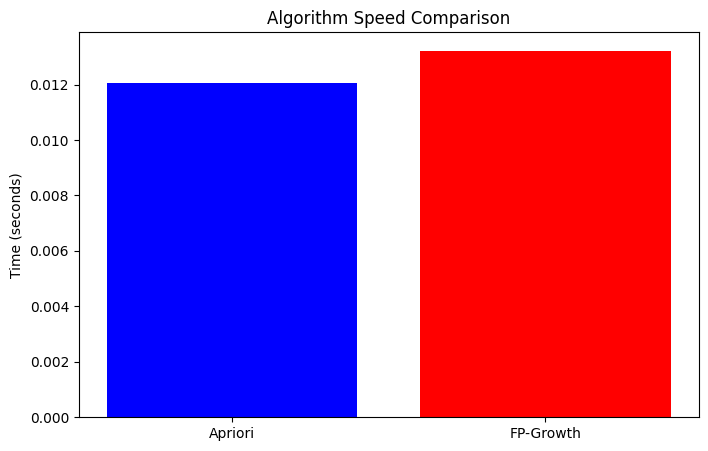

In [37]:
# Plot execution time
plt.figure(figsize=(8, 5))
plt.bar(['Apriori', 'FP-Growth'], [apriori_time, fpgrowth_time], color=['blue', 'red'])
plt.ylabel('Time (seconds)')
plt.title('Algorithm Speed Comparison')
plt.show()

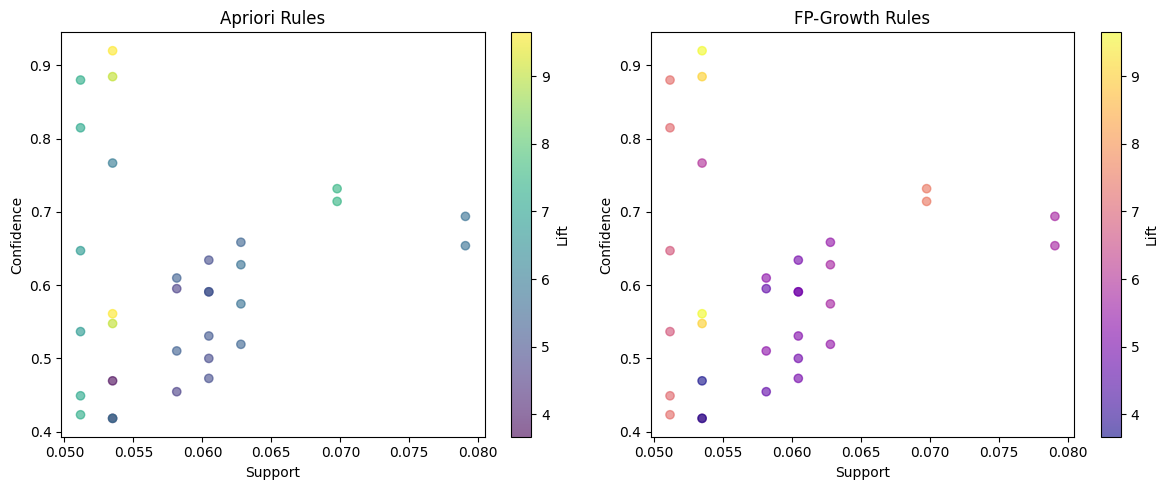

In [38]:
# Visualize rules - Support vs Confidence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(rules_ap['support'], rules_ap['confidence'], c=rules_ap['lift'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Apriori Rules')

plt.subplot(1, 2, 2)
plt.scatter(rules_fp['support'], rules_fp['confidence'], c=rules_fp['lift'], cmap='plasma', alpha=0.6)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('FP-Growth Rules')

plt.tight_layout()
plt.show()

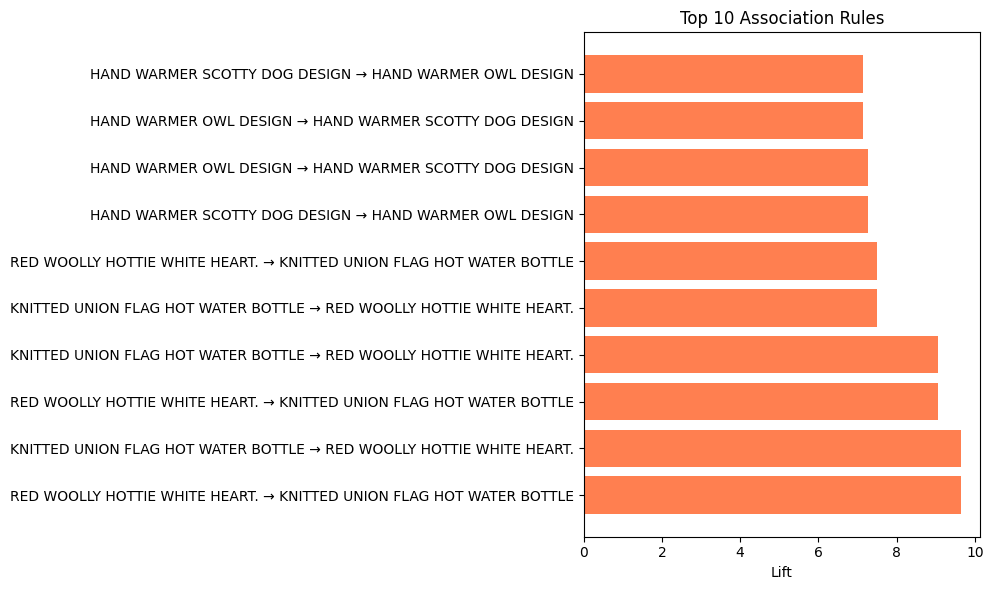

In [39]:
# Show top 10 rules by lift
top_rules = rules_fp.nlargest(10, 'lift')

plt.figure(figsize=(10, 6))
rules_text = [f"{list(r['antecedents'])[0]} → {list(r['consequents'])[0]}" for _, r in top_rules.iterrows()]
plt.barh(range(10), top_rules['lift'], color='coral')
plt.yticks(range(10), rules_text)
plt.xlabel('Lift')
plt.title('Top 10 Association Rules')
plt.tight_layout()
plt.show()

# Conclusion

In [40]:
print("Final Results:")
print("=" * 60)
print(f"\nBoth algorithms give the same rules (same support, confidence, and lift)")
print(f"But FP-Growth is faster: {fpgrowth_time:.3f}s vs {apriori_time:.3f}s")
print(f"FP-Growth is {((apriori_time - fpgrowth_time) / apriori_time * 100):.1f}% faster\n")
print("Recommendation: Use FP-Growth for better performance")
print("=" * 60)

Final Results:

Both algorithms give the same rules (same support, confidence, and lift)
But FP-Growth is faster: 0.013s vs 0.012s
FP-Growth is -9.7% faster

Recommendation: Use FP-Growth for better performance
